In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.rcParams["font.size"] = 18

In [3]:
def load_data(file):
  data = pd.read_csv(file)
  data['success rate'] = 100 - data['error rate']
  data['num nodes'] = data['num mobiles'] + data['num statics']
  data['mobiles rate'] = np.round(data['num mobiles'] / data['num nodes'] * 100.0)
  data['mean uptime'] = data['mean uptime'] / 3600
  return data

In [4]:
def plot(data, ax, f1, f2, f3, f4, x, y, 
  linestyle=None, color=None, marker=None, label=None):

  data = data[
    (data[f1[0]] == f1[1]) & 
    (data[f2[0]] == f2[1]) & 
    (data[f3[0]] == f3[1]) &
    (data[f4[0]] == f4[1])
  ].sort_values(by=x)
  x, y = (data[x], data[y])
  ax.plot(x, y, ls=linestyle, color=color, marker=marker, label=label)

In [5]:
def fig_robustness(data, ax, fw, fh, nn, mr, y, 
  linestyle=None, color=None, marker=None, label=None):
  plot(data, ax,
    f1=('field height', fh), 
    f2=('num nodes', nn), 
    f3=('mobiles rate', mr), 
    f4=('field width', fw),
    x='num obstacles', y=y,
    linestyle=linestyle,
    color=color,
    marker=marker,
    label=label,
  )

In [6]:
def fig_trans_dist(data, ax, fh, nn, mr, no, y, 
  linestyle=None, color=None, marker=None, label=None):
  plot(data, ax,
    f1=('field height', fh), 
    f2=('num nodes', nn), 
    f3=('mobiles rate', mr), 
    f4=('num obstacles', no),
    x='field width', y=y,
    linestyle=linestyle,
    color=color,
    marker=marker,
    label=label,
  )

In [7]:
def fig_num_of_nodes(data, ax, fw, fh, no, mr, y, 
  linestyle=None, color=None, marker=None, label=None):
  plot(data, ax,
    f1=('field height', fh), 
    f2=('num obstacles', no), 
    f3=('mobiles rate', mr), 
    f4=('field width', fw),
    x='num nodes', y=y,
    linestyle=linestyle,
    color=color,
    marker=marker,
    label=label,
  )

In [8]:
def fig_mobiles_rate(data, ax, fw, fh, nn, no, y, 
  linestyle=None, color=None, marker=None, label=None):
  plot(data, ax,
    f1=('field height', fh), 
    f2=('num nodes', nn), 
    f3=('field width', fw), 
    f4=('num obstacles', no),
    x='mobiles rate', y=y,
    linestyle=linestyle,
    color=color,
    marker=marker,
    label=label,
  )

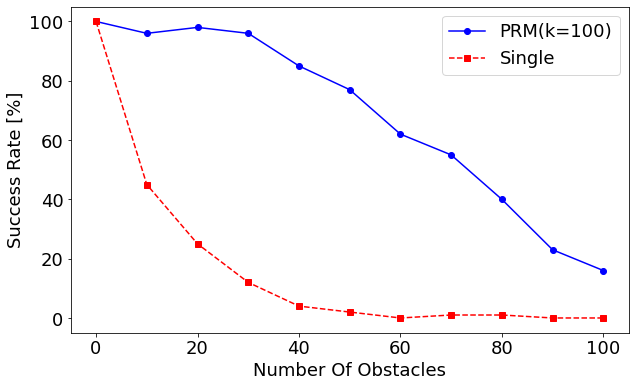

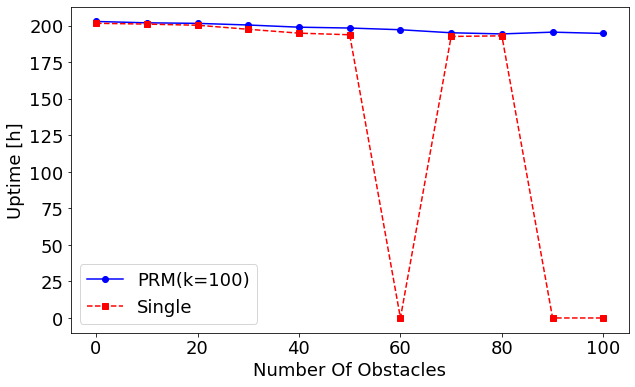

In [9]:
multi = load_data('./robustness-multi-u.csv')
single = load_data('./robustness-single.csv')

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
fig_robustness(multi, ax, fw=600, fh=400, nn=100, mr=50, y='success rate', 
  linestyle='-', color='blue', marker='o', label='PRM(k=100)')
fig_robustness(single, ax, fw=600, fh=400, nn=100, mr=50, y='success rate', 
  linestyle='--', color='red', marker='s', label='Single')
ax.set_xlabel('Number Of Obstacles')
ax.set_ylabel('Success Rate [%]')
ax.legend()

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
fig_robustness(multi, ax, fw=600, fh=400, nn=100, mr=50, y='mean uptime', 
  linestyle='-', color='blue', marker='o', label='PRM(k=100)')
fig_robustness(single, ax, fw=600, fh=400, nn=100, mr=50, y='mean uptime', 
  linestyle='--', color='red', marker='s', label='Single')
ax.set_xlabel('Number Of Obstacles')
ax.set_ylabel('Uptime [h]')
ax.legend()
plt.show()

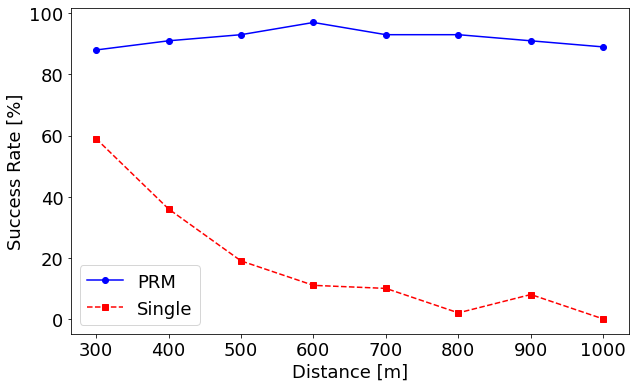

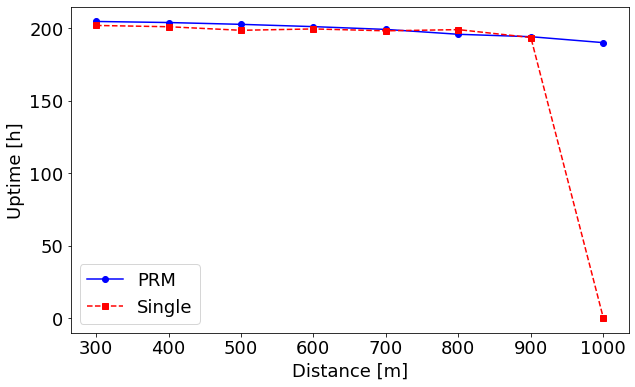

In [10]:
multi = load_data('./basedist-multi-u.csv')
single = load_data('./basedist-single.csv')

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
fig_trans_dist(multi, ax, fh=400, nn=100, mr=50, no=30, y='success rate', 
  linestyle='-', color='blue', marker='o', label='PRM')
fig_trans_dist(single, ax, fh=400, nn=100, mr=50, no=30, y='success rate', 
  linestyle='--', color='red', marker='s', label='Single')
ax.set_xlabel('Distance [m]')
ax.set_ylabel('Success Rate [%]')
ax.legend()
plt.show()

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
fig_trans_dist(multi, ax, fh=400, nn=100, mr=50, no=30, y='mean uptime', 
  linestyle='-', color='blue', marker='o', label='PRM')
fig_trans_dist(single, ax, fh=400, nn=100, mr=50, no=30, y='mean uptime', 
  linestyle='--', color='red', marker='s', label='Single')
ax.set_xlabel('Distance [m]')
ax.set_ylabel('Uptime [h]')
ax.legend()
plt.show()

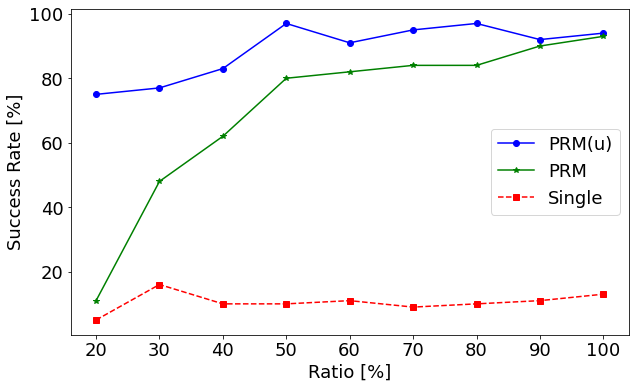

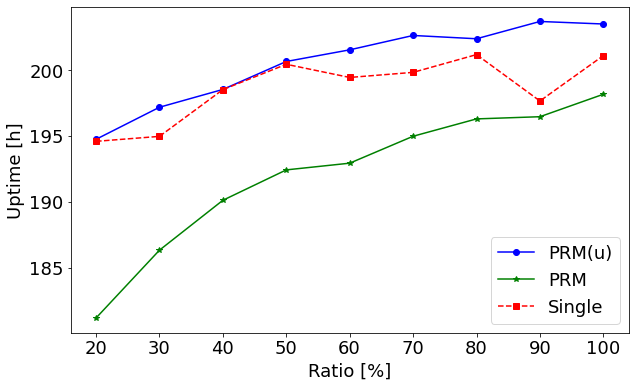

In [11]:
multiu = load_data('./mobilerate-multi-u.csv')
multi = load_data('./mobilerate-multi.csv')
single = load_data('./mobilerate-single.csv')

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
fig_mobiles_rate(multiu, ax, fw=600, fh=400, nn=100, no=30, y='success rate', 
  linestyle='-', color='blue', marker='o', label='PRM(u)')
fig_mobiles_rate(multi, ax, fw=600, fh=400, nn=100, no=30, y='success rate', 
  linestyle='-', color='green', marker='*', label='PRM')
fig_mobiles_rate(single, ax, fw=600, fh=400, nn=100, no=30, y='success rate', 
  linestyle='--', color='red', marker='s', label='Single')
ax.set_xlabel('Ratio [%]')
ax.set_ylabel('Success Rate [%]')
ax.legend()
plt.show()

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
fig_mobiles_rate(multiu, ax, fw=600, fh=400, nn=100, no=30, y='mean uptime', 
  linestyle='-', color='blue', marker='o', label='PRM(u)')
fig_mobiles_rate(multi, ax, fw=600, fh=400, nn=100, no=30, y='mean uptime', 
  linestyle='-', color='green', marker='*', label='PRM')
fig_mobiles_rate(single, ax, fw=600, fh=400, nn=100, no=30, y='mean uptime', 
  linestyle='--', color='red', marker='s', label='Single')
ax.set_xlabel('Ratio [%]')
ax.set_ylabel('Uptime [h]')
ax.legend()
plt.show()

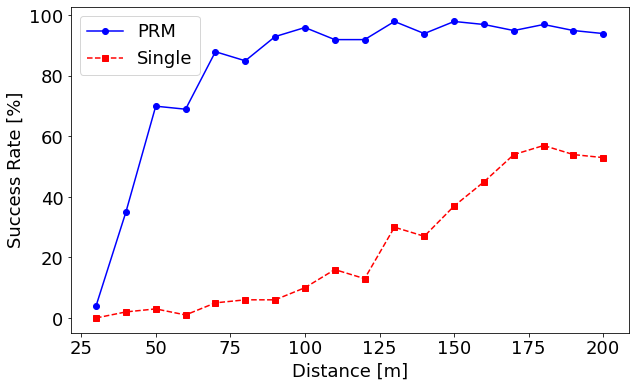

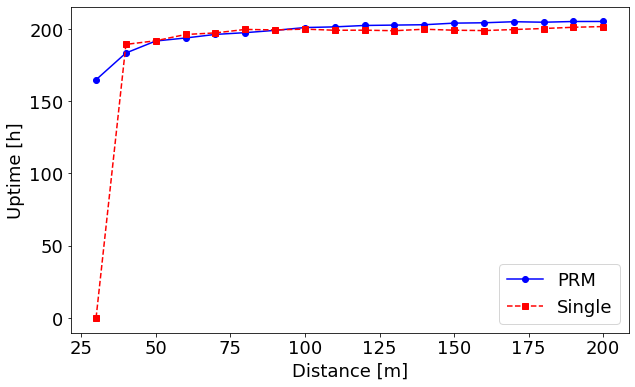

In [16]:
multi = load_data('./nn-multi-u.csv')
single = load_data('./nn-single.csv')

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
fig_num_of_nodes(multi, ax, fh=400, fw=600, mr=50, no=30, y='success rate', 
  linestyle='-', color='blue', marker='o', label='PRM')
fig_num_of_nodes(single, ax, fh=400, fw=600, mr=50, no=30, y='success rate', 
  linestyle='--', color='red', marker='s', label='Single')
ax.set_xlabel('Number Of Nodes')
ax.set_ylabel('Success Rate [%]')
ax.legend()
plt.show()

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
fig_num_of_nodes(multi, ax, fh=400, fw=600, mr=50, no=30, y='mean uptime', 
  linestyle='-', color='blue', marker='o', label='PRM')
fig_num_of_nodes(single, ax, fh=400, fw=600, mr=50, no=30, y='mean uptime', 
  linestyle='--', color='red', marker='s', label='Single')
ax.set_xlabel('Number Of Nodes')
ax.set_ylabel('Uptime [h]')
ax.legend()
plt.show()